In [187]:
import numpy as np
import matplotlib.pyplot as plt

# VD: 
## f(x) = x**2 + 5 * sin(x)
## f'(x) = 2 * x + 5 * cos(x)
# Áp dụng Gradient Descent
## x(t+1) = x(t) - lr * f'(x)

In [188]:
# Tính đạo hàm
def gradient(x):
    return 2*x + 5*np.cos(x)

In [189]:
# Tính giá trị của hàm số
def cost(x):
    return x**2 + 5*np.sin(x)

In [214]:
# Áp dụng GD
def GD_pure(x_0, lr):
    x = [x_0]
    for it in range(100):
        x_new = x[-1] - lr*gradient(x[-1])
        # dừng thuật toán khi đạo hàm đủ nhỏ
        if abs(gradient(x_new)) < 1e-3:
            break
        x.append(x_new)
    return(x, it)

# Áp dụng GD tại điểm xuất phát khác nhau
## x_0 = -5, x_0=5 và có cùng learning_rate=0.1

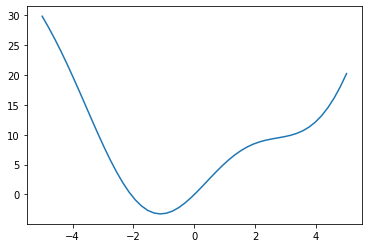

In [191]:
x = np.linspace(-5, 5)
plt.plot(x, cost(x))

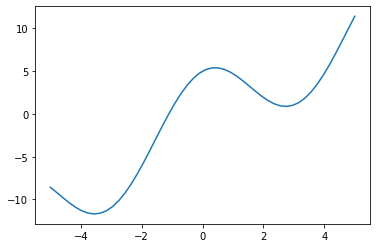

In [192]:
x = np.linspace(-5, 5)
plt.plot(x, gradient(x))

In [193]:
(x1, it1) = GD(-5, .1)
(x2, it2) = GD(5, .1)
print('Solution x1 = %f, cost = %f, after %d iterations' %(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, after %d iterations' %(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, after 29 iterations


([<matplotlib.axis.XTick at 0x13fce8603c8>,
 <a list of 3 Text xticklabel objects>)

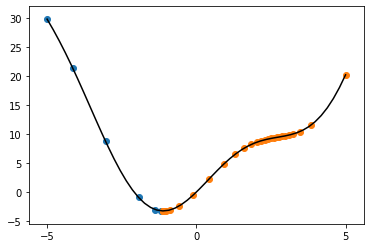

In [194]:
x1 = np.array(x1)
x2 = np.array(x2)

x = np.linspace(-5, 5)
plt.plot(x, cost(x), color='black')
plt.scatter(x1, cost(x1))
plt.scatter(x2, cost(x2))

plt.xticks([-5, 0, 5])

([<matplotlib.axis.XTick at 0x13fce7ade88>,
 <a list of 3 Text xticklabel objects>)

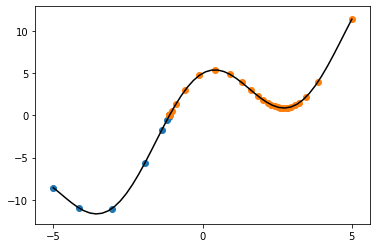

In [195]:
x1 = np.array(x1)
x2 = np.array(x2)

x = np.linspace(-5, 5)
plt.plot(x, gradient(x), color='black')
plt.scatter(x1, gradient(x1))
plt.scatter(x2, gradient(x2))

plt.xticks([-5, 0, 5])

# Kết luận:
## Thuật toán trả về kết quả gần giống nhau với các điểm xuất phát khác nhau, nhưng tốc độ hội tụ khác nhau (11 vòng lặp và 29 vòng)
## Vơi x_0 = -5, thuật toán hội tụ nhanh hơn, hơn nữa đường đi tới đích khá suôn sẻ với đạo hàm luôn âm và trị tuyệt đối của đạo hàm nhỏ dần khi x(t) tiến gần tới đích.
## Với x_0 = 5, do có chưa một vùng có đạo hàm gần bằng không khiến thuật toán bị hấp dẫn và tốn nhiều thời gian để thoát ra khỏi điểm đó.
## Vậy: các điểm không phải là điểm cực tiểu nhưng có đạo hàm gần bằng không rất dễ gây ra hiện tượng x(t) bị 'bẫy' vì đạo hàm nhỏ khiến nó không thay đổi nhiều ở các vòng lặp tiếp theo.

# Áp dụng GD với tốc độ học khác nhau
## Cùng xuất phát tại điểm x_0=-5
## Nhưng với learning_rate là 0.01 và 0.5

In [196]:
(x1, it1) = GD(-5, .01)
(x2, it2) = GD(-5, .5)
print('Solution x1 = %f, cost = %f, after %d iterations' %(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, after %d iterations' %(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.117990, cost = -3.246213, after 99 iterations
Solution x2 = -2.495603, cost = 3.218089, after 99 iterations


([<matplotlib.axis.XTick at 0x13fce66f588>,
 <a list of 3 Text xticklabel objects>)

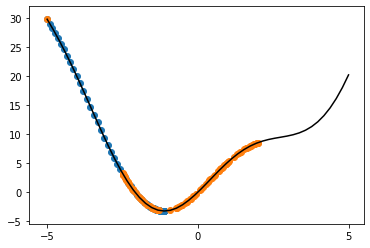

In [197]:
x1 = np.array(x1)
x2 = np.array(x2)

x = np.linspace(-5, 5)
plt.plot(x, cost(x), color='black')
plt.scatter(x1, cost(x1))
plt.scatter(x2, cost(x2))

plt.xticks([-5, 0, 5])

([<matplotlib.axis.XTick at 0x13fce4bbb48>,
 <a list of 3 Text xticklabel objects>)

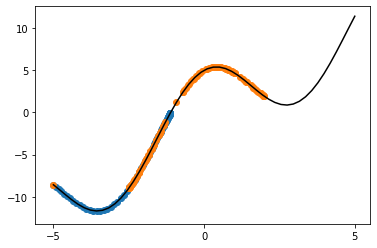

In [198]:
x1 = np.array(x1)
x2 = np.array(x2)

x = np.linspace(-5, 5)
plt.plot(x, gradient(x), color='black')
plt.scatter(x1, gradient(x1))
plt.scatter(x2, gradient(x2))

plt.xticks([-5, 0, 5])

# Kết luận:
## Với eta = 0.01, tốc độ hội tụ rất chậm. Trong thực tế, khi việc tính toán trở nên phức tạp, tốc độ học thấp sẽ ảnh hưởng nhiều tới tốc độ của thuật toán. Thậm chí x(t) có thể không bao giờ hội tụ
## Với eta = 0.5, 

# 2/ Gradient descent cho hàm nhiều biến
## Áp dụng GD cho bài toán linear regression
### Loss_function = 1/N * norm( y - X.T * w)**2
### Gradient = 1/N * X * (X.T * w - y)
### VD: 1000 điểm dữ liệu xuất hiện xung quanh với phường trình đường thẳng y= 4 + 3* x

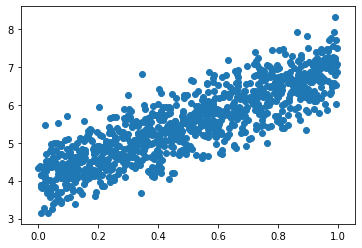

In [199]:
np.random.seed(45)
X = np.random.rand(1000)
y = 4 + 3*X + .5*np.random.randn(1000) # add noise
plt.scatter(X, y)

In [200]:
def gradient(w, y):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

In [201]:
def cost(w, y):
    N = Xbar.shape[0]
    return 1/N * np.linalg.norm(y - Xbar.dot(w))**2

In [202]:
def GD(w_init, gradient, lr, y):
    w = [w_init]
    for it in range(1, 100):
        w_new = w[-1] - lr*gradient(w[-1], y)
        if np.linalg.norm(gradient(w[-1], y)) / len(w_new) < 1e-3:
            break
        w.append(w_new)
    return w, it

In [203]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis=1)
y_ = y.reshape(-1, 1)
w_init = np.array([[2], [1]])
w, it = GD(w_init, gradient, 1, y_)
print("GD's solution: w = ", w[-1].T, ', after %d iterations:' %it)

GD's solution: w =  [[4.05732617 2.90677744]] , after 48 iterations:


Text(0.5, 1.0, "GD's solution: weight = 2.906777 _ bias = 4.057326")

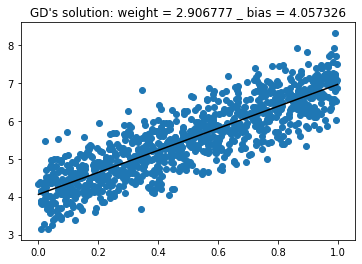

In [204]:
weight = w[-1].T
w_0 = weight[0, 0]
w_1 = weight[0, 1]

x_min = (X.min())
x_max = (X.max())
y_min = w_1* x_min + w_0
y_max = w_1* x_max + w_0

plt.scatter(X, y)
plt.plot((x_min, x_max), (y_min, y_max), color='black')
plt.title("GD's solution: weight = %f _ bias = %f" %(w_1, w_0))

In [205]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
w, b = model.coef_[0][0], model.intercept_[0]

Text(0.5, 1.0, "Scikit-learn's solution: weight = 2.932030 _ bias = 4.044009")

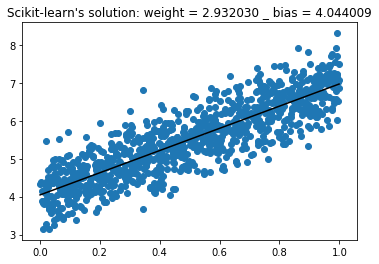

In [206]:
x_min = (X.min())
x_max = (X.max())
y_min = w* x_min + b
y_max = w* x_max + b

plt.scatter(X, y)
plt.plot((x_min, x_max), (y_min, y_max), color='black')
plt.title("Scikit-learn's solution: weight = %f _ bias = %f" %(w, b))

# 3/ Gradient descent momentum
## VD: 
### f(x) = x**2 + 10sin(x)
### f'(x) = 2x + 10cos(x)

In [207]:
def gradient(x):
    return 2*x + 10*np.cos(x)

In [208]:
def cost(x):
    return x**2 + 10*np.sin(x)

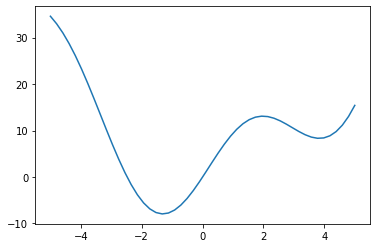

In [209]:
x = np.linspace(-5, 5)
plt.plot(x, cost(x))

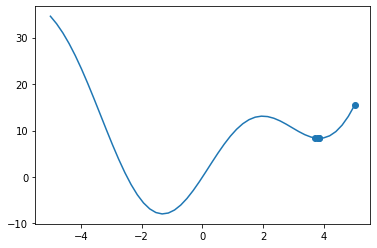

In [218]:
(x, it) = GD_pure(5, .1)
x = np.array(x)
y = cost(x)
plt.scatter(x, y)
x = np.linspace(-5, 5)
plt.plot(x, cost(x))

In [223]:
def GD_momentum(x_init, gradient, gamma, lr):
    x = [x_init]
    v_old = np.zeros_like(x_init)
    for it in range(100):
        v_new = gamma*v_old + lr*gradient(x[-1])
        x_new = x[-1] - v_new
        if np.linalg.norm(gradient(x_new)) / np.array(x_init).size < 1e-3:
            break
        x.append(x_new)
        v_old = v_new
    return x

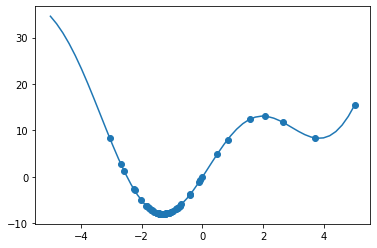

In [225]:
x = GD_momentum(5, gradient, 0.9, .1)
x = np.array(x)
y = cost(x)
plt.scatter(x, y)
x = np.linspace(-5, 5)
plt.plot(x, cost(x))

# 4/ Nesterov Accelerated Gradient

In [245]:
def GD_NAG(x_init, gradient, gamma, lr):
    x = [x_init]
    v = [np.zeros_like(x_init)]
    for it in range(1, 100):
        v_new = gamma*v[-1] + lr*gradient(x[-1] - gamma*v[-1])
        x_new = x[-1] - v_new
        if np.linalg.norm(gradient(x_new)) / np.array(x_init).size < 1e-3:
            break
        x.append(x_new)
        v.append(v_new)
    return x

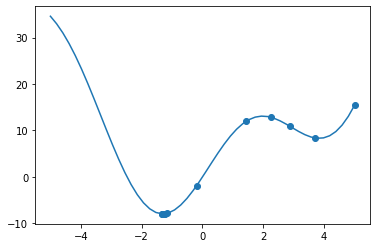

In [246]:
x = GD_NAG(5, gradient, 0.9, .1)
x = np.array(x)
y = cost(x)
plt.scatter(x, y)
x = np.linspace(-5, 5)
plt.plot(x, cost(x))